In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

#Training the data based on these categories
train = fetch_20newsgroups(subset='train', categories=categories)

#Testing the data for these categories
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
#print(train.data[5])
print(len(train.data))

11314


In [10]:
#import the necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Create the model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#training the data based on the training data
model.fit(train.data, train.target)

#Creating labels and predicting the data
labels = model.predict(test.data)


Text(89.1331,0.5,'predicted label')

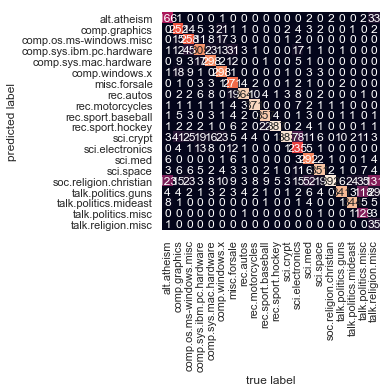

In [11]:
#Creating a confusion matrix and a heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, 
            yticklabels=train.target_names)
#Plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [12]:
#Predicting new data based on training data
def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]


In [ ]:
predict_category('Porsche is better than Lambhorghini')

'talk.politics.misc'